In [22]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from scipy import interpolate
from matplotlib import rc
import astropy as ap
from astropy.cosmology import WMAP7
import os
import pickle
import seaborn as sns


import matplotlib.patheffects as patheffects
from matplotlib import rcParams

# rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
#rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Ubuntu'
# rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] = 15
rcParams['axes.labelsize'] = 15
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 13

In [23]:
os.chdir('/Users/nitya/Work/Data/Project1/measurements')
print(os.getcwd())
file2 = open(r'tracer_bin_opt_inf.pkl', 'rb')
d = pickle.load(file2, encoding = 'latin1')
file2.close()
#What's up with 445?

print(np.shape(d))
# indz = np.where(d[:,0]!=445)[0]
# d = d[indz]
# print np.shape(d)
bins = [np.int(d[:,0][i]) for i in range(len(d[:,0]))]



/Users/nitya/Work/Data/Project1/measurements
(467, 3)


In [24]:
os.chdir('/Users/nitya/Work/Data/Project1/magphys')
print(os.getcwd())
file = [str(bins[i]) + '.0' + '.fit' for i in range(len(bins))]


/Users/nitya/Work/Data/Project1/Magphys


(467, 681)


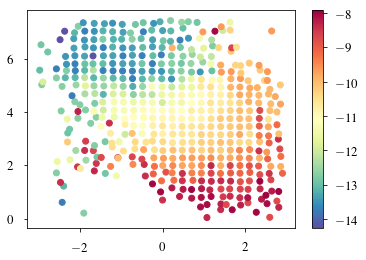

In [26]:
#print file
lines = np.asarray([open(file[i]).readlines() for i in range(len(bins))])
#print lines[350][15]
print(np.shape(lines))
ble = np.vectorize(np.float)

c = np.asarray([ble(lines[i][10].split()) for i in range(len(bins))])
#3: TauV 2: mu 4: SSFR 6: Ldust in solar luminosities
mu = c[:,2]
tauV = c[:,3]
ssfr = c[:,4]
log_ssfr = np.asarray([log10(c[:,4][i]) for i in range(len(bins))])


plt.scatter(d[:,2],d[:,1],c = log_ssfr, cmap = plt.cm.Spectral_r)
plt.colorbar()
plt.show()


In [ ]:
dat = np.column_stack((bins,log_ssfr))
afile = open(r'bin_magphys.pkl', 'wb')
pickle.dump(dat, afile)
afile.close()